In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = "../MRNet/MRNet-v1.0/train/axial/0000.npy"

In [3]:
img = np.load(data_path) / 255.0

In [4]:
print(img.shape)

(44, 256, 256)


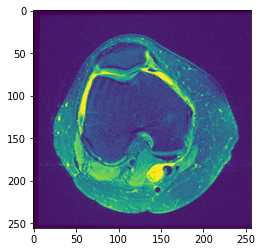

In [5]:
fig, axs = plt.subplots()
axs.imshow(img[20, :, :])
plt.show()

In [6]:
img_inverse = np.copy(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        for k in range(img.shape[2]):
            img_inverse[i, j, k] = 1 - img_inverse[i, j, k]

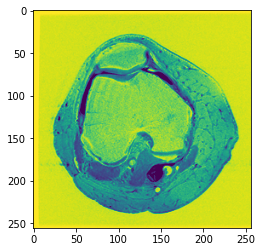

In [7]:
fig, axs = plt.subplots()
axs.imshow(img_inverse[20, :, :])
plt.show()

In [ ]:
highest_boundary_value = 0
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        prev = img_inverse[i, j, 0]
        for k in range(1, img.shape[2]):
            row_boundary_value = 0
            if prev - img_inverse[i, j, k] > 0.1:
                row_boundary_value = img_inverse[i, j, k]
                if row_boundary_value > highest_boundary_value:
                    highest_boundary_value = row_boundary_value
                break
            prev = img_inverse[i, j, k]
print(highest_boundary_value)

In [8]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        # From left to right
        for k in range(img.shape[2]):
            if img_inverse[i, j, k] < 0.8:
                break;
            img_inverse[i, j, k] = 0
        for k in range(img.shape[2] - 1, -1, -1):
            if img_inverse[i, j, k] < 0.8:
                break;
            img_inverse[i, j, k] = 0

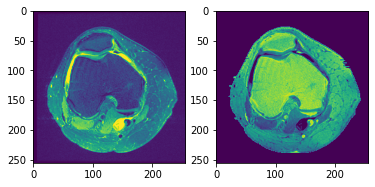

In [9]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img[20, :, :])
axs[1].imshow(img_inverse[20, :, :])
plt.show()

In [ ]:
sliceToCheck = 0
fig, axs = plt.subplots(5, 3, figsize=(15, 35))
for i in range(5):
    axs[i, 0].imshow(fixedImg[sliceToCheck + i * 5,:,:,0])
    axs[i, 0].set_title("Fixed Image")
    axs[i, 1].imshow(moving_test[0,sliceToCheck + i * 5,:,:,0])
    axs[i, 1].set_title("Moving Image")
    axs[i, 2].imshow(warped_test[0,sliceToCheck + i * 5,:,:,0])
    axs[i, 2].set_title("Warped Image")
plt.show()